# Clustering
### Questão 1
- Primeiro, queremos agrupar nossos super-heróis de acordo com seus poderes e informações. Execute um método de cluster não supervisionado usando o número de clusters que você julgar mais apropriado.
    -   1.Qual algoritmo você escolheu e por quê? 
        - `RESPOSTA`: Algoritmo de clusterização hierarquica com distancia de gower, pois o temos dados categoricos e continuos
    -   2.Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia de recursos (seleção) que você executou.
        - `RESPOSTA`: Na clusterização usei todas as features, removendo os duplicados e tratando os valores nulos, além disso fiz agregação de algumas features, minmax scale em variáveis numericas e label encoder para variáveis categóricas. Nulos categoricos foram substituidos pela categoria outros, numericos faltantes foram substituidos usando a médias dos valores não nulos de gênero e raça
### Questão 2
- Um dos desafios do clustering é definir o número certo de clusters. Como você escolheu esse número? Como você avalia a qualidade dos clusters finais?
    - `RESPOSTA`: Para definir o numeros de clusters usei o dendograme e avaliação dos clusters foi feito pela medida da silhoueta, se eu entende-se mais sobre heróis poderia ter avaliado se os clusters te sentido quando interpretado a partir das características.
### Questão 3
Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer pré-processamento e engenharia de recursos que você aplicou no processo.
 - 1. Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?
    -  `RESPOSTA`:  Hipotéses naive bayes são:
        - Independencia entre as variáveis
        - Contribuição igual das variáveis
        - Variáveis continuas normalmente distribuidas.
 - 2. Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?
        - `RESPOSTA`:  Como tenho dados mistos optei para mix naive bayes, que é capaz de lidar com variáveis categoricas e apliquei minmax scale em variáveis numericas e label encoder para variáveis categóricas. 
 - 3. Como você avalia os resultados?
        - `RESPOSTA`: Usando métricas como F1-score e matrix de confusão.
### Questão 4
 Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado para essa tarefa.
 - 1. O que motivou sua escolha do algoritmo?
    - `RESPOSTA`: Modelo de random forest, foi escolhido pois é um modelo mais robusto que o naive bayes e se baseia em combinar multiplos modelos treinados em subconjuntos.
 - 2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem?
  - `RESPOSTA`: Random forest é mais resistente a ouliers e entende  melhor as relacoes complexas em cenários com muitas variáveis, como esse dataset que tem tem poucas observações e muitas features
### Questão 5
Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.
- 1. Qual algoritmo você escolheu e por quê?
    - `RESPOSTA`: Usei o randomforest e apliquei o one-hot encoder para as variáveis categorias. 
- 2. Como você avalia o desempenho do seu algoritmo neste caso?
 - `RESPOSTA`: Para o modelo de regressão usei o R2 e rmse e usei apenas as features com correlação pela ANOVA e a altura (com isso a quantidade de features reduziu consideravelmente, não usei todas) 

### Questão 6
- Quais aspectos desse conjunto de dados apresentam problemas para agrupamento, classificação e regressão? Como você resolveu esses problemas?  
    - `RESPOSTA`: os dados faltantes, dados duplicados em relação ao nome dos herois, as variáveis categoricas relacionadas aos poderes não são balanceadas. Os dados duplicados resolvi contando a quantidade de informaçoes faltantes e escolhi ficar com as linhas com menos dados faltantes, ainda sim, tinhamos colunas com a mesma quantidade de dados faltantes para resolver isso olhei as informações para decidir com qual linha ficar. Com relação as variáveis númericas eu usei a anova para ver correlação entre as variáveis numericas e categoricas e definir qual seriam agrupada para imputar o valor médio aos dados faltantes. 
 ### Streamlit
 - Não fiz essa parte do case.    

In [1]:
import pandas as pd
import numpy as np
from aux_functions import transform_text, format_object_columns, format_column_name
from plot_aux import plot_boxplot, plot_hist, plot_bar_list_features, calculate_anova

In [2]:
heroes_info_df = pd.read_csv('heroes_information.csv')
heroes_power_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_info_df = format_column_name(heroes_info_df)
heroes_power_df = format_column_name(heroes_power_df)

In [4]:
heroes_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed:_0  734 non-null    int64  
 1   name        734 non-null    object 
 2   gender      734 non-null    object 
 3   eye_color   734 non-null    object 
 4   race        734 non-null    object 
 5   hair_color  734 non-null    object 
 6   height      734 non-null    float64
 7   publisher   719 non-null    object 
 8   skin_color  734 non-null    object 
 9   alignment   734 non-null    object 
 10  weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [5]:
heroes_info_df = heroes_info_df.iloc[: , 1:]

In [6]:
heroes_power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [7]:
heroes_power_df.rename(columns= {'hero_names':'name'}, inplace=True)

In [8]:
heroes_info_df  = format_object_columns(heroes_info_df)
heroes_power_df = format_object_columns(heroes_power_df)

In [9]:
merged_df = pd.merge(heroes_info_df, heroes_power_df, on="name")

In [10]:
columnsbool = merged_df.select_dtypes(include=['bool']).columns.tolist()

In [11]:
merged_df.head()

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight,...,web_creation,reality_warping,odin_force,symbiote_costume,speed_force,phoenix_force,molecular_dissipation,vision__cryo,omnipresent,omniscient
0,a-bomb,male,yellow,human,no hair,203.0,marvel comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,abe sapien,male,blue,icthyo sapien,no hair,191.0,dark horse comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,abin sur,male,blue,ungaran,no hair,185.0,dc comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,abomination,male,green,human-radiation,no hair,203.0,marvel comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,abraxas,male,blue,cosmic entity,black,-99.0,marvel comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
print(f"heroes_power_df shape: {heroes_power_df.shape}")
print(f"heroes_info_df shape: {heroes_info_df.shape}")
print(f"merged_df shape: {merged_df.shape}")

heroes_power_df shape: (667, 168)
heroes_info_df shape: (734, 10)
merged_df shape: (660, 177)


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Columns: 177 entries, name to omniscient
dtypes: bool(167), float64(2), object(8)
memory usage: 159.3+ KB


In [14]:
print(heroes_info_df['gender'].unique())
print(heroes_info_df['eye_color'].unique())
print(heroes_info_df['race'].unique())
print(heroes_info_df['hair_color'].unique())
print(heroes_info_df['publisher'].unique())
print(heroes_info_df['name'].unique())

['male' 'female' '-']
['yellow' 'blue' 'green' 'brown' '-' 'red' 'violet' 'white' 'purple'
 'black' 'grey' 'silver' 'yellow-red' 'yellow (without irises)' 'gold'
 'blue-white' 'hazel' 'green-blue' 'white-red' 'indigo' 'amber'
 'yellow-blue' 'bown']
['human' 'icthyo sapien' 'ungaran' 'human-radiation' 'cosmic entity' '-'
 'cyborg' 'xenomorph xx121' 'android' 'vampire' 'mutant' 'god-eternal'
 'symbiote' 'atlantean' 'alien' 'neyaphem' 'new god' 'alpha' 'bizarro'
 'inhuman' 'metahuman' 'demon' 'human-clone' 'human-kree'
 'dathomirian zabrak' 'amazon' 'human-cosmic' 'human-altered' 'kryptonian'
 'kakarantharaian' 'zen-whoberian' 'strontian' 'kaiju' 'saiyan' 'gorilla'
 'rodian' 'flora colossus' 'human-vuldarian' 'asgardian' 'demi-god'
 'eternal' 'gungan' 'bolovaxian' 'animal' 'czarnian' 'martian' 'spartoi'
 'planet' 'luphomoid' 'parademon' 'yautja' 'maiar' 'clone' 'talokite'
 'korugaran' 'zombie' 'human-vulcan' 'human-spartoi' 'tamaranean'
 'frost giant' 'mutant-clone' "yoda's species"]
['no

In [15]:
numeric_features = ['weight', 'height']

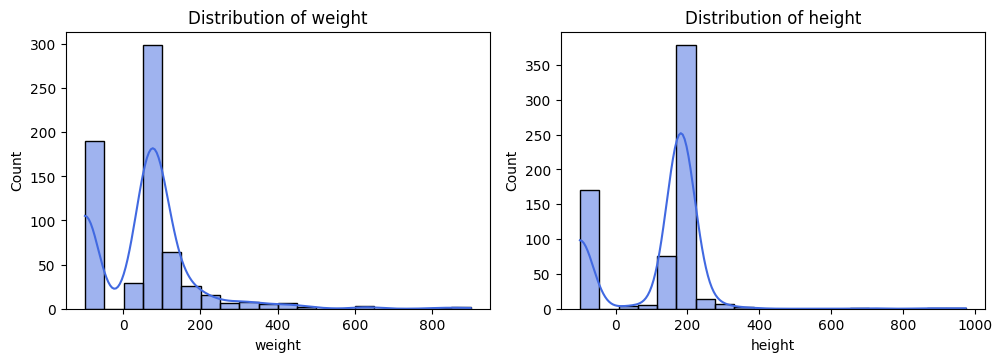

In [16]:
plot_hist(df=merged_df, numeric_features=numeric_features)

In [17]:
string_features =  merged_df.select_dtypes("object").columns.tolist()
string_features.remove('name')

In [18]:
string_features_bool = merged_df.select_dtypes("bool").columns.tolist()

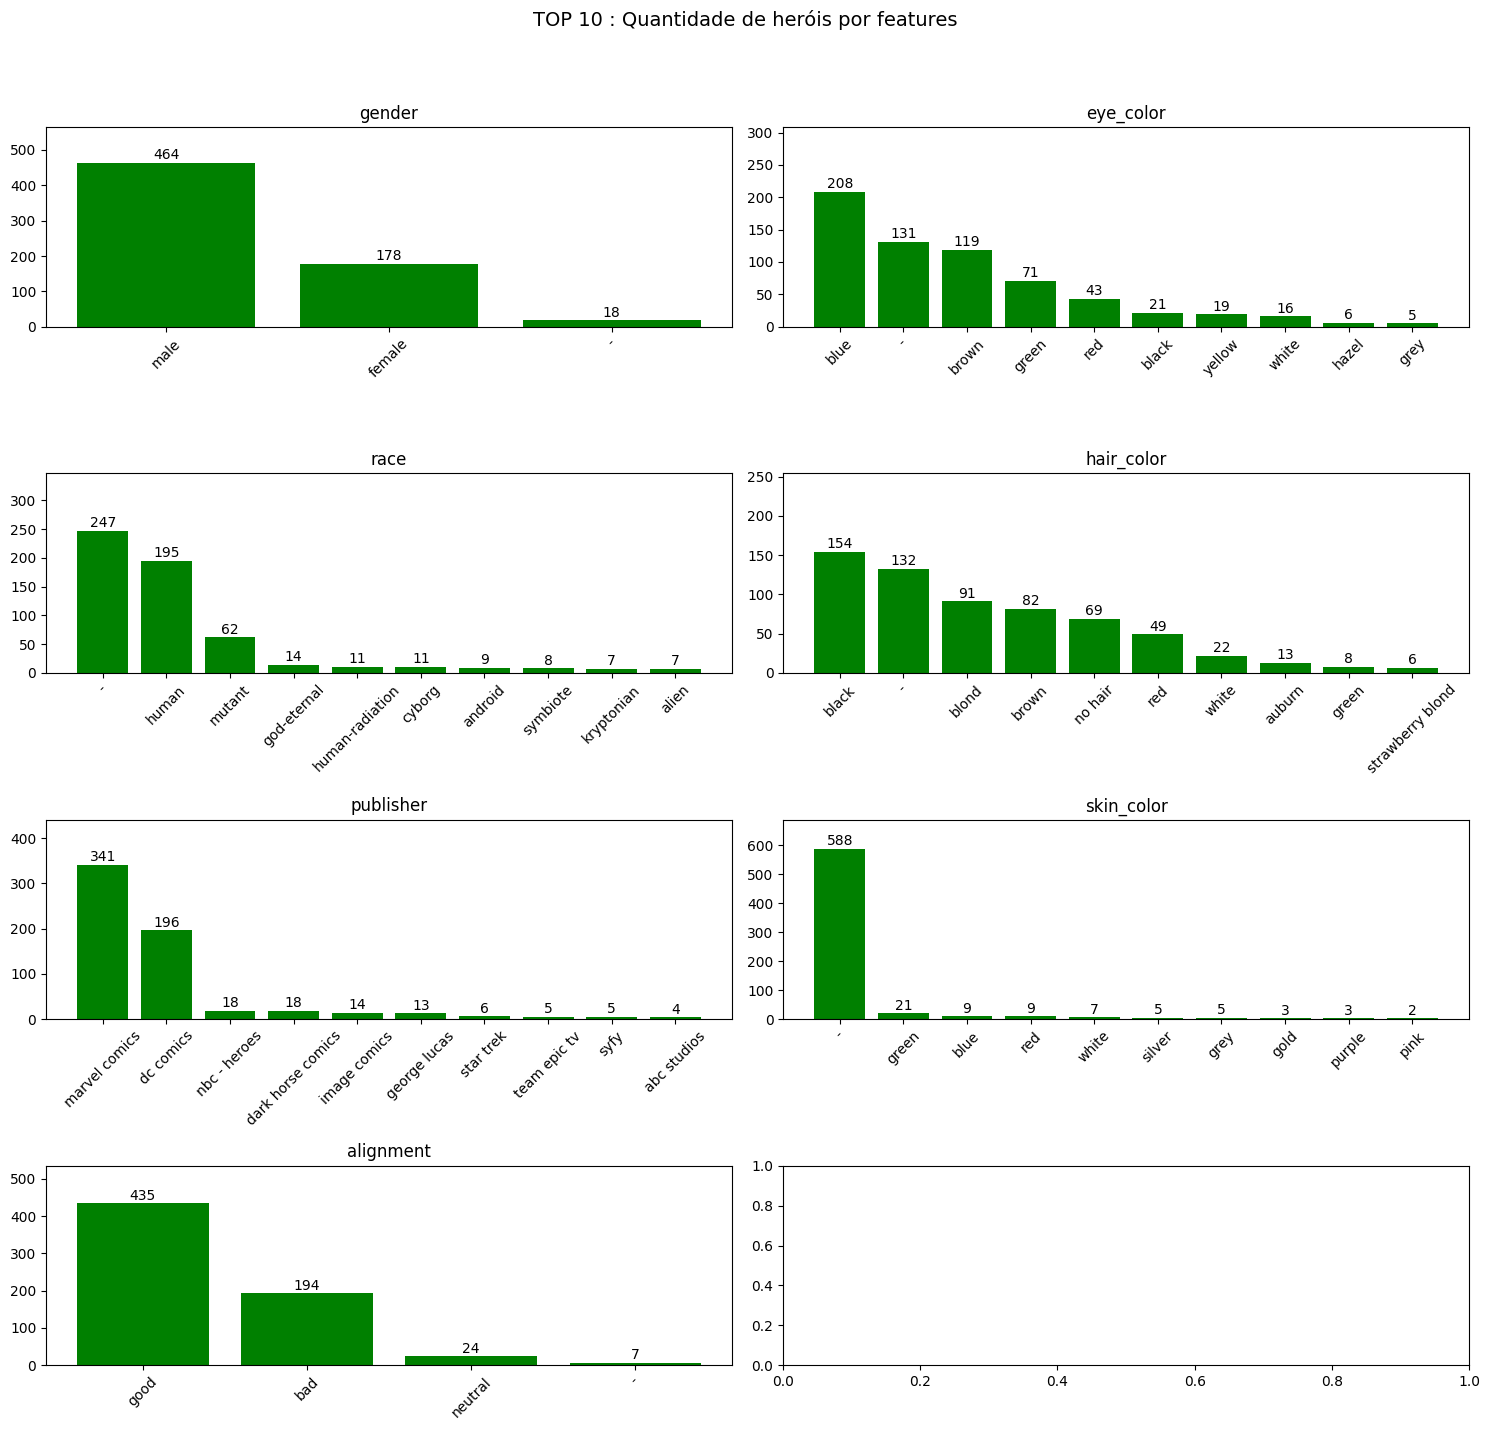

In [19]:
plot_bar_list_features(df=merged_df, feature_list = string_features)

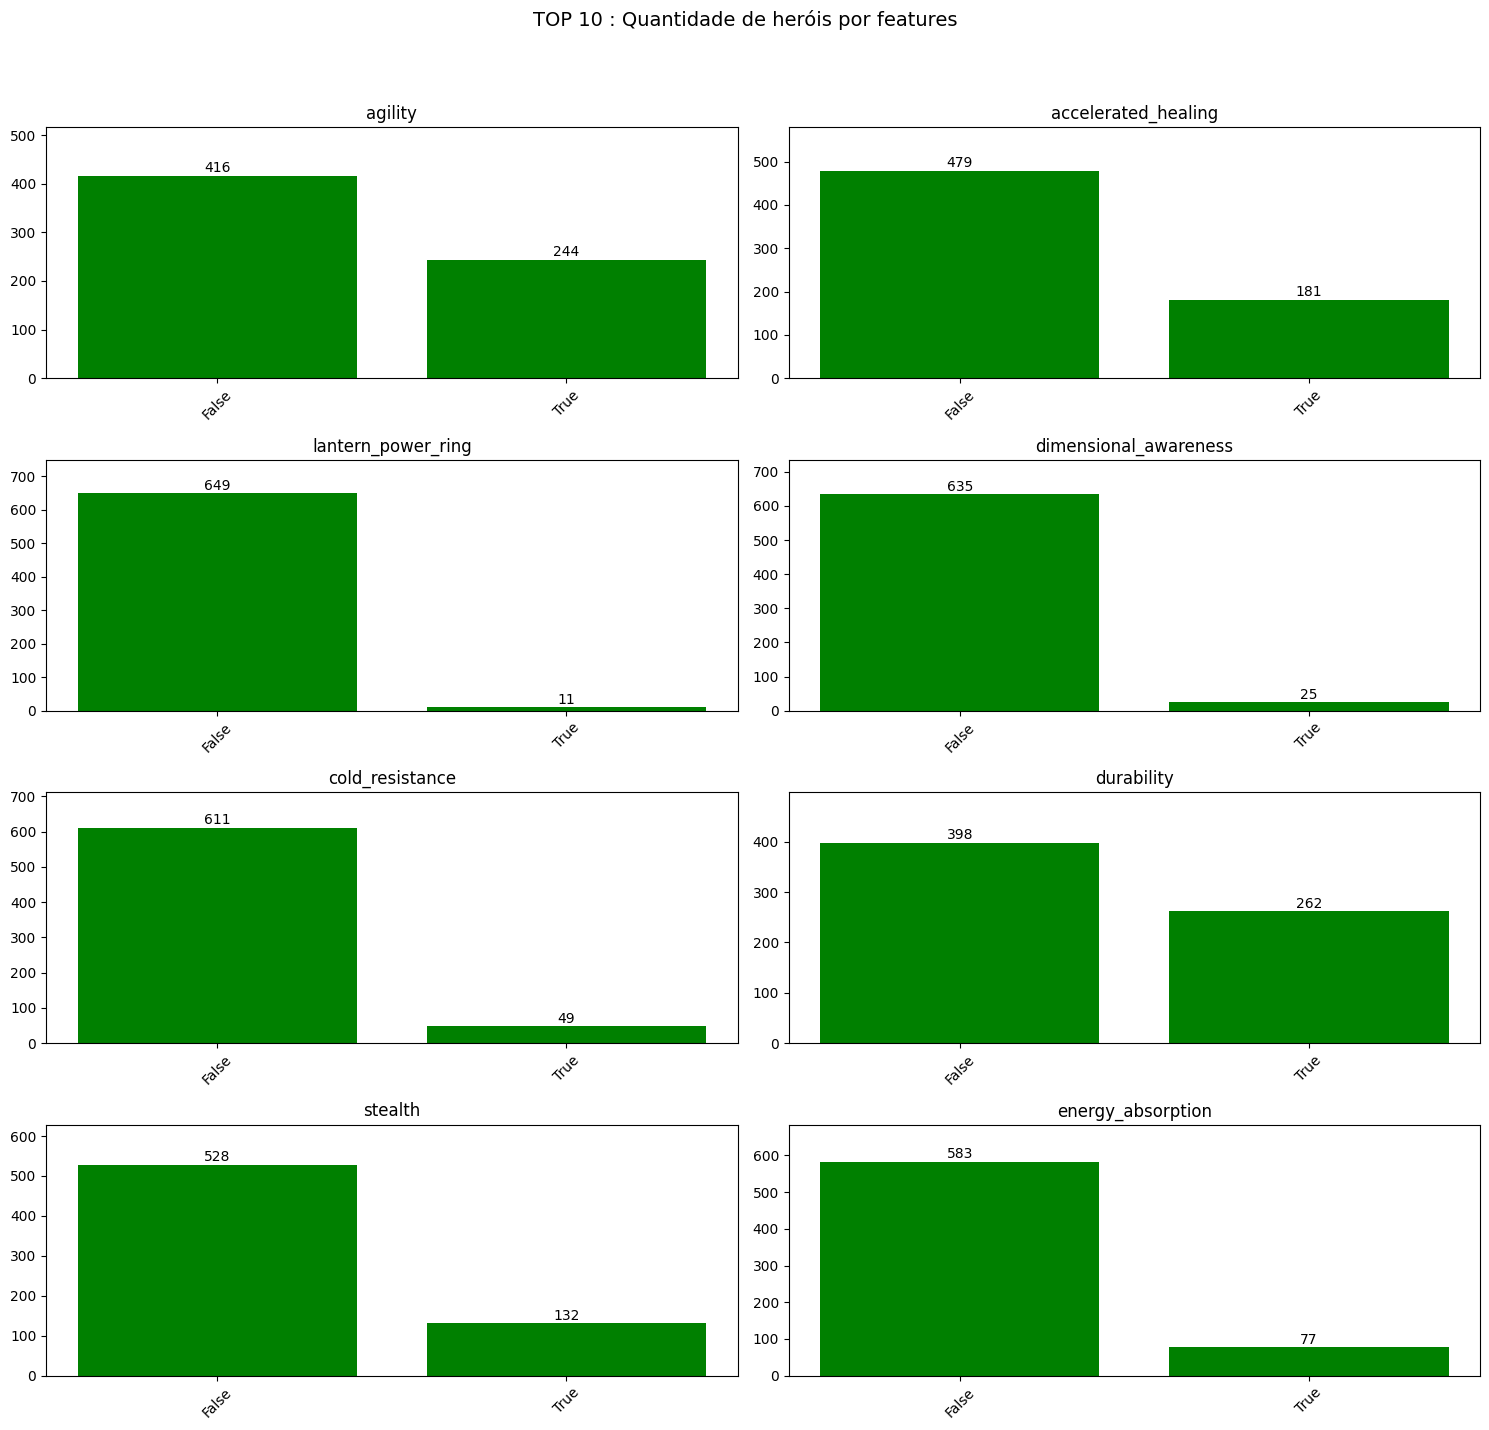

In [20]:
plot_bar_list_features(df=merged_df, feature_list = string_features_bool[0:8])

PRÉ-PROCESSAMENTO DE DADOS

TRATAMENTO: Nulls e duplicados  dados

In [21]:
merged_df.replace('-', np.nan, inplace=True)
merged_df.replace(-99.0, np.nan, inplace=True)

In [22]:
merged_df[merged_df.duplicated()]

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight,...,web_creation,reality_warping,odin_force,symbiote_costume,speed_force,phoenix_force,molecular_dissipation,vision__cryo,omnipresent,omniscient


In [23]:
grouped = merged_df.groupby('name').size().reset_index(name='count')

filtered_df = grouped[grouped['count'] > 1]
filtered_df

,name,count
20,angel,2
43,atlas,2
44,atom,2
56,batgirl,2
59,batman,2
85,black canary,2
100,blizzard,2
106,blue beetle,2
133,captain marvel,2
225,firestorm,2


In [24]:
merged_df[merged_df['name']=='spider-man']

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight,...,web_creation,reality_warping,odin_force,symbiote_costume,speed_force,phoenix_force,molecular_dissipation,vision__cryo,omnipresent,omniscient
561,spider-man,male,hazel,human,brown,178.0,marvel comics,NaN,good,74.0,...,True,False,False,False,False,False,False,False,False,False
562,spider-man,NaN,red,human,brown,178.0,marvel comics,NaN,good,77.0,...,True,False,False,False,False,False,False,False,False,False
563,spider-man,male,brown,human,black,157.0,marvel comics,NaN,good,56.0,...,True,False,False,False,False,False,False,False,False,False


In [25]:
merged_df['qtd_null_columns']= merged_df.apply(lambda x: x.isna().sum(), axis=1)

In [26]:
null_values_duplicates = merged_df[
    merged_df['name'].isin(grouped[grouped['count'] > 1]['name'].tolist())][['name','qtd_null_columns']].reset_index()

min_nul_values_duplicates = merged_df[
    merged_df['name'].isin(grouped[grouped['count'] > 1]['name'].tolist())][['name','qtd_null_columns']].groupby('name')[['name', 'qtd_null_columns']].transform('min').drop_duplicates()

min_nul_values_duplicates.rename(columns = {'qtd_null_columns':'min_null'}, inplace=True)

nulls_merged = pd.merge(null_values_duplicates, min_nul_values_duplicates,  on="name")

nulls_merged['remove_null'] = nulls_merged['qtd_null_columns'] > nulls_merged['min_null']
indices_to_delete = nulls_merged[nulls_merged['remove_null']==True]['index'].tolist()

In [27]:
merged_df.drop(indices_to_delete, inplace=True)

In [28]:
grouped = merged_df.groupby('name').size().reset_index(name='count')

filtered_df = grouped[grouped['count'] > 1]
filtered_df

,name,count
43,atlas,2
59,batman,2
85,black canary,2
133,captain marvel,2
548,spider-man,2
594,toxin,2


In [29]:
merged_df[merged_df['name'].isin(filtered_df['name'].tolist())][heroes_info_df.columns.tolist()]

,name,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight
44,atlas,male,brown,mutant,red,183.0,marvel comics,NaN,good,101.0
45,atlas,male,blue,god-eternal,brown,198.0,dc comics,NaN,bad,126.0
63,batman,male,blue,human,black,188.0,dc comics,NaN,good,95.0
64,batman,male,blue,human,black,178.0,dc comics,NaN,good,77.0
90,black canary,female,blue,human,blond,165.0,dc comics,NaN,good,58.0
91,black canary,female,blue,metahuman,blond,170.0,dc comics,NaN,good,59.0
141,captain marvel,female,blue,human-kree,blond,180.0,marvel comics,NaN,good,74.0
142,captain marvel,male,blue,human,black,193.0,dc comics,NaN,good,101.0
561,spider-man,male,hazel,human,brown,178.0,marvel comics,NaN,good,74.0
563,spider-man,male,brown,human,black,157.0,marvel comics,NaN,good,56.0


In [30]:
merged_df.drop([90,141,563,610, 45, 64, 142], inplace=True)

In [31]:
grouped = merged_df.groupby('name').size().reset_index(name='count')

filtered_df = grouped[grouped['count'] > 1]
filtered_df

,name,count


TRATAMENTO: Dados faltantes

In [32]:
null_counts = merged_df.isnull().sum().reset_index()

null_counts = null_counts[null_counts[0]>0]
null_counts.rename(columns={0:'number_nulls'}, inplace=True)
null_counts['percentage_nulls'] = (null_counts['number_nulls'] / len(merged_df)) * 100

In [33]:
null_counts

,index,number_nulls,percentage_nulls
1,gender,17,2.647975
2,eye_color,123,19.158879
3,race,240,37.383178
4,hair_color,124,19.314642
5,height,161,25.077882
6,publisher,13,2.024922
7,skin_color,570,88.785047
8,alignment,7,1.090343
9,weight,183,28.504673


In [34]:
merged_df = merged_df.drop(columns=['skin_color'])

In [35]:
allowed_vals_publish = ['marvel comics', 'dc comics']
merged_df['publisher'] = merged_df['publisher'].apply(lambda x: x if x in allowed_vals_publish else "others")

In [36]:
allowed_vals_race = ['human', 'mutant']
merged_df['race'] = merged_df['race'].apply(lambda x: x if x in allowed_vals_race else "others")

In [37]:
browns_hair_list = [
    'brown-black',
    'brown-white',
    'brownn',
 ]
red_hair_list = [
    'red-grey',
    'magenta',
    'red-grey',
    'red-orange',
    'red-white',
    'auburn'
 ]
blond_hair_list =  ['yellow', 'gold',  'strawberry blond']
white_hair_list = ['silver', 'grey']
black_hair_list = ['black-blue']
allowed_vals_hair_colors =  ['black', 'blond', 'brown', 'no hair', 'red', 'white']

In [38]:
merged_df['hair_color'] = merged_df['hair_color'].apply(lambda x: 'brown' if x in browns_hair_list else x)
merged_df['hair_color'] = merged_df['hair_color'].apply(lambda x: 'red' if x in red_hair_list else x)
merged_df['hair_color'] = merged_df['hair_color'].apply(lambda x: 'blond' if x in blond_hair_list else x)
merged_df['hair_color'] = merged_df['hair_color'].apply(lambda x: 'white' if x in white_hair_list else x)
merged_df['hair_color'] = merged_df['hair_color'].apply(lambda x: 'black' if x in black_hair_list else x)

merged_df['hair_color'] = merged_df['hair_color'].apply(lambda x: x if x in allowed_vals_hair_colors else "others")

In [39]:
yellow_eyes_list = ['yellow-red', 'yellow-blue', 'yellow (without irises)']
merged_df['eye_color'] = merged_df['eye_color'].apply(lambda x: 'yellow' if x in yellow_eyes_list else x)

allowed_vals_eye_color = ['blue', 'brown', 'green', 'red', 'black','yellow']
merged_df['eye_color'] = merged_df['eye_color'].apply(lambda x: x if x in allowed_vals_eye_color else "others")

In [40]:
merged_df['gender'] = merged_df['gender'].fillna('unknown')
merged_df['alignment'] = merged_df['alignment'].fillna('unknown')
# merged_df['eye_color'] = merged_df['eye_color'].fillna('unknown')
merged_df['race'] = merged_df['race'].fillna('unknown')
# merged_df['hair_color'] = merged_df['hair_color'].fillna('unknown')
merged_df['publisher'] = merged_df['publisher'].fillna('others')

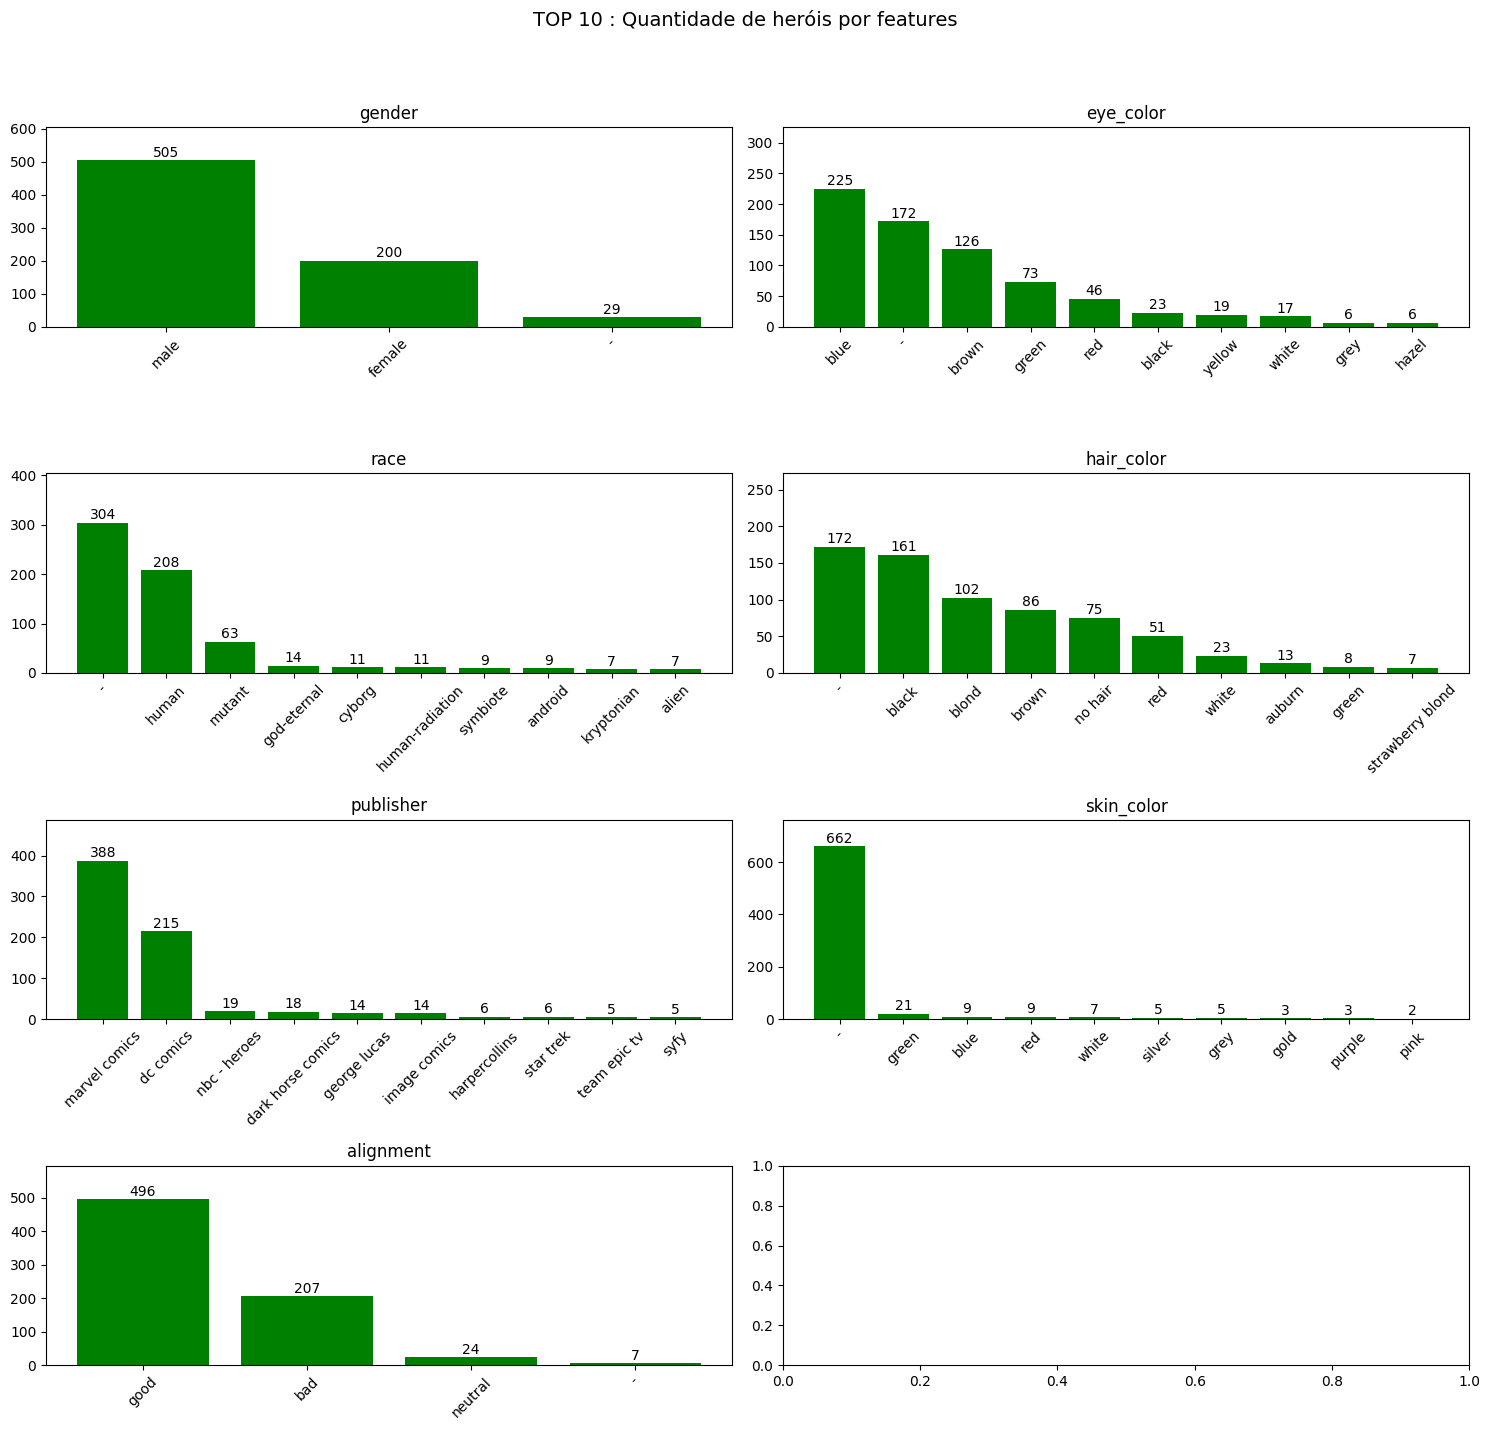

In [41]:
plot_bar_list_features(df=heroes_info_df, feature_list = string_features)

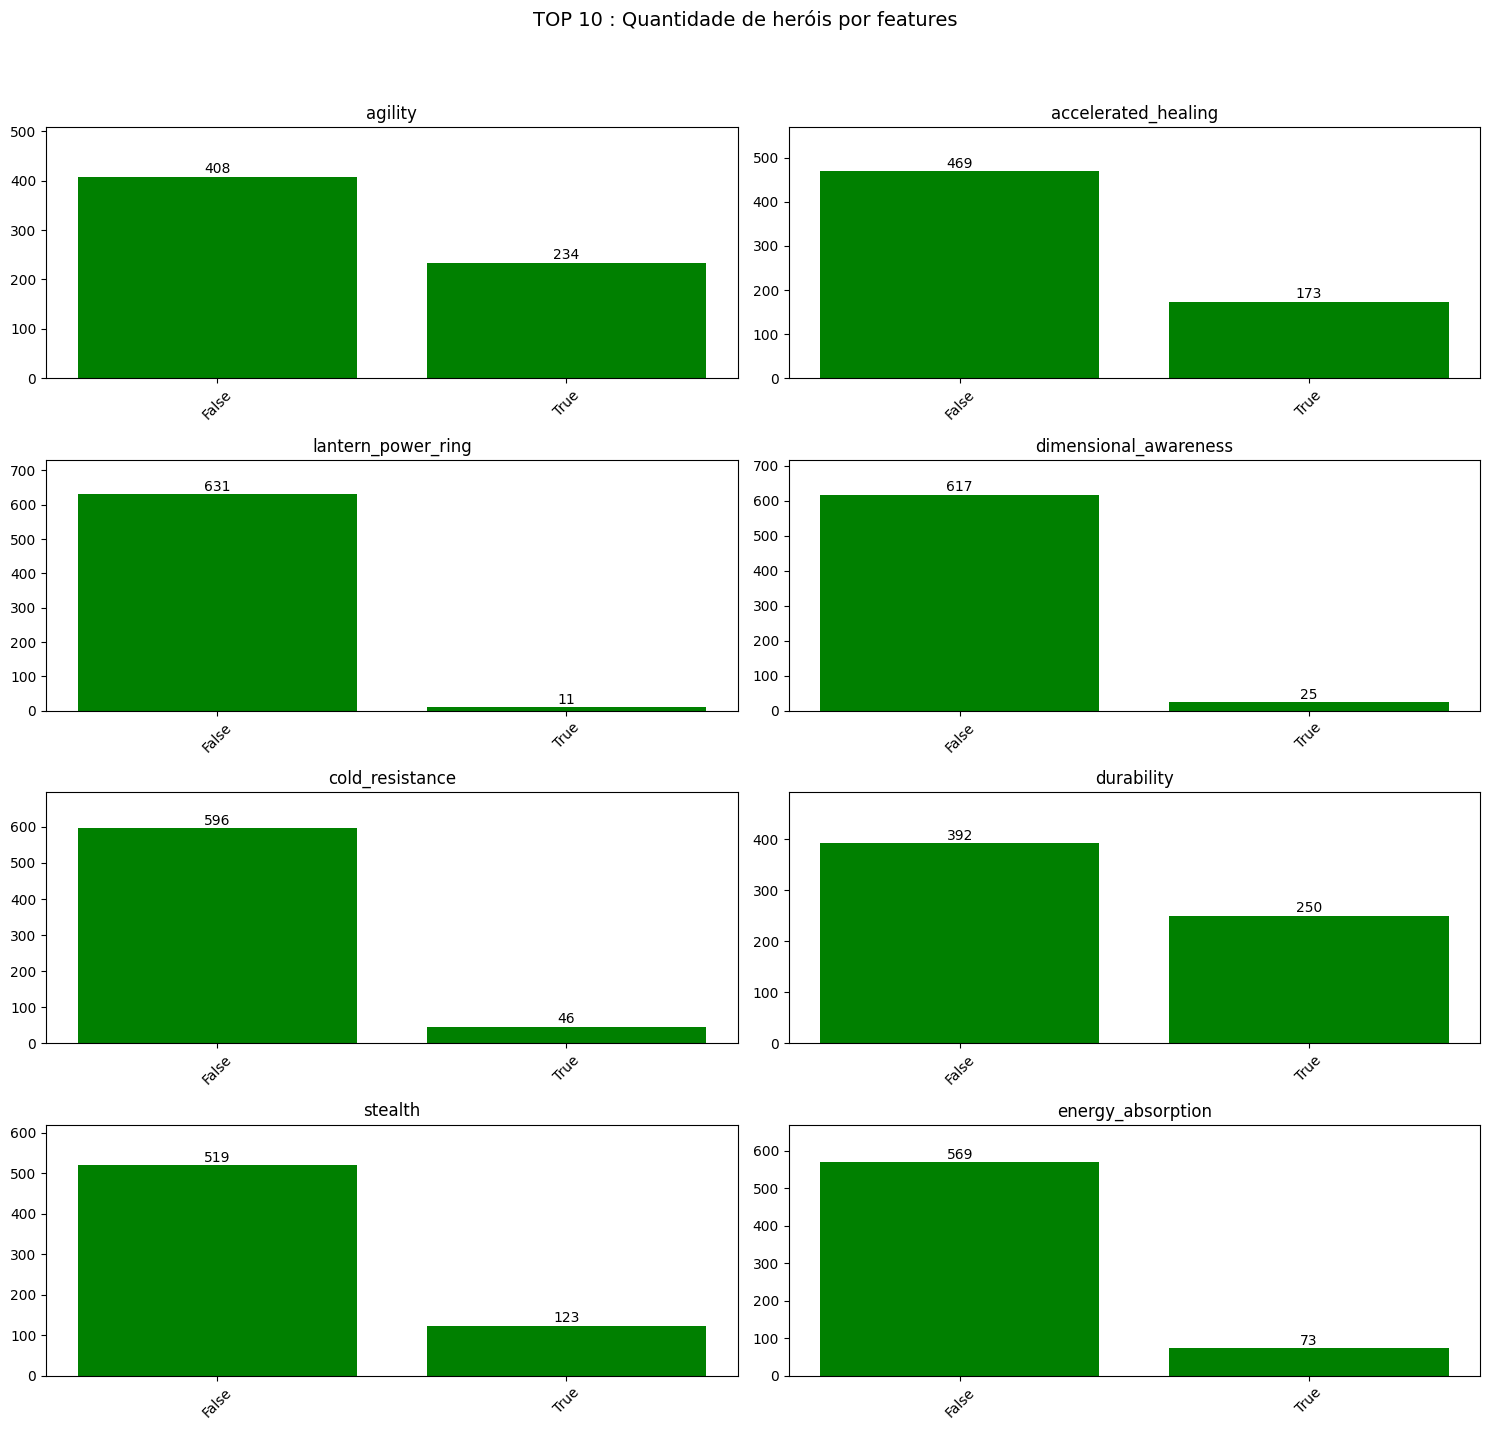

In [42]:
plot_bar_list_features(df=merged_df, feature_list = string_features_bool[0:8])

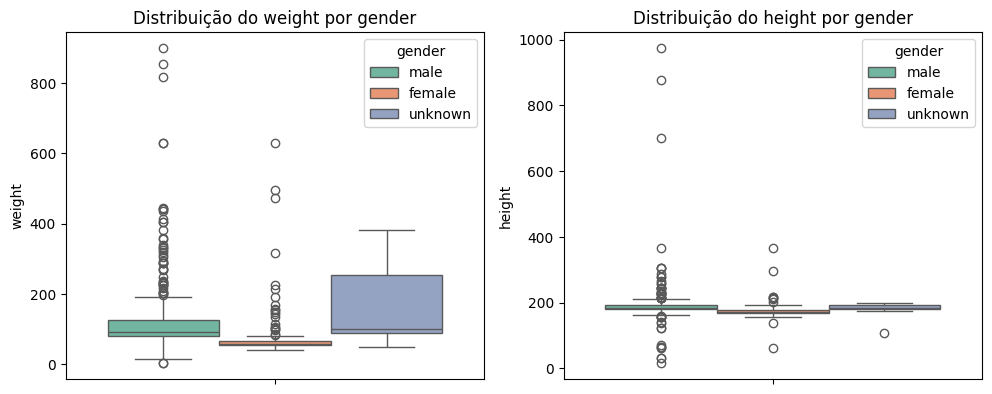

In [43]:
plot_boxplot(df=merged_df, numeric_features=numeric_features, hue='gender')

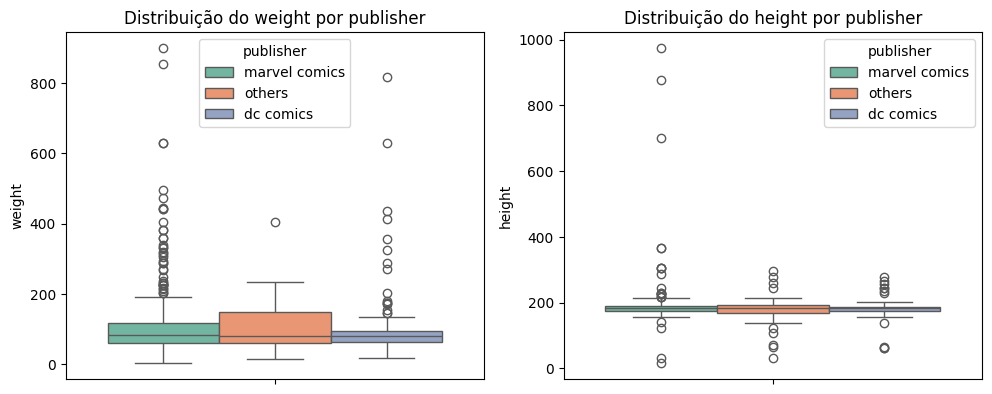

In [44]:
plot_boxplot(df=merged_df, numeric_features=numeric_features, hue='publisher')

In [45]:
columns_for_weight = [
    'gender',
    'eye_color',
    'race',
    'hair_color',
    'publisher',
    'alignment']

columns_for_height = [
    'gender',
    'eye_color',
    'race',
    'hair_color',
    'publisher',
    'alignment']

In [46]:
height_anova_df = calculate_anova(
    df=merged_df[(merged_df['height'].isna()==False)], 
    numeric_var='height', 
    categorical_vars=columns_for_height)

In [47]:
weight_anova_df = calculate_anova(
    df=merged_df[ (merged_df['weight'].isna()==False)], 
    numeric_var='weight', categorical_vars=columns_for_weight)

In [48]:
height_anova_significativas = height_anova_df[height_anova_df['PR(>F)']< 0.05]['variable'].tolist()
height_anova_significativas


['gender', 'eye_color', 'alignment']

In [49]:
merged_df['height'] = merged_df['height'].fillna(merged_df.groupby(['gender'])['height'].transform('mean'))

In [50]:
weight_anova_significativas = weight_anova_df[weight_anova_df['PR(>F)']< 0.05]['variable'].tolist()
weight_anova_significativas


['gender', 'eye_color', 'race', 'hair_color', 'alignment']

In [51]:
merged_df['weight'] = merged_df['weight'].fillna(merged_df.groupby(['gender', 'race'])['weight'].transform('mean'))

In [52]:
null_counts = merged_df.isnull().sum().reset_index()

null_counts = null_counts[null_counts[0]>0]
null_counts.rename(columns={0:'number_nulls'}, inplace=True)
null_counts['percentage_nulls'] = (null_counts['number_nulls'] / len(merged_df)) * 100

null_counts

,index,number_nulls,percentage_nulls


In [53]:
merged_df = merged_df.drop(columns=['qtd_null_columns'])

In [54]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
import gower
from plot_aux import plot_dendograma,bar_plot, plot_silhouette, matrix_correlation_plot
from models import apply_scaler, apply_label_encoder, format_int_columns_into_categorical
from sklearn.preprocessing import MinMaxScaler,  LabelEncoder

/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
data_to_cluster = merged_df.copy() 

In [56]:
data_to_cluster = data_to_cluster.set_index('name')
    

In [57]:
scaler = MinMaxScaler()

data_to_cluster[numeric_features] = scaler.fit_transform(data_to_cluster[numeric_features])

In [58]:
data_to_cluster = apply_label_encoder(df=data_to_cluster)

format_int_columns_into_categorical(data_to_cluster)

In [59]:
categorical_columns = [pd.api.types.is_categorical_dtype(data_to_cluster[col]) for col in data_to_cluster.columns]

/var/folders/vm/sbm35km911qf8q2j6hpdkmyr0000gn/T/ipykernel_15757/1010630492.py:1: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  categorical_columns = [pd.api.types.is_categorical_dtype(data_to_cluster[col]) for col in data_to_cluster.columns]


In [60]:
dist_matrix = gower.gower_matrix(data_to_cluster, cat_features=categorical_columns)
linkage_matrix = linkage(dist_matrix, method='median')

/var/folders/vm/sbm35km911qf8q2j6hpdkmyr0000gn/T/ipykernel_15757/1927762174.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='median')


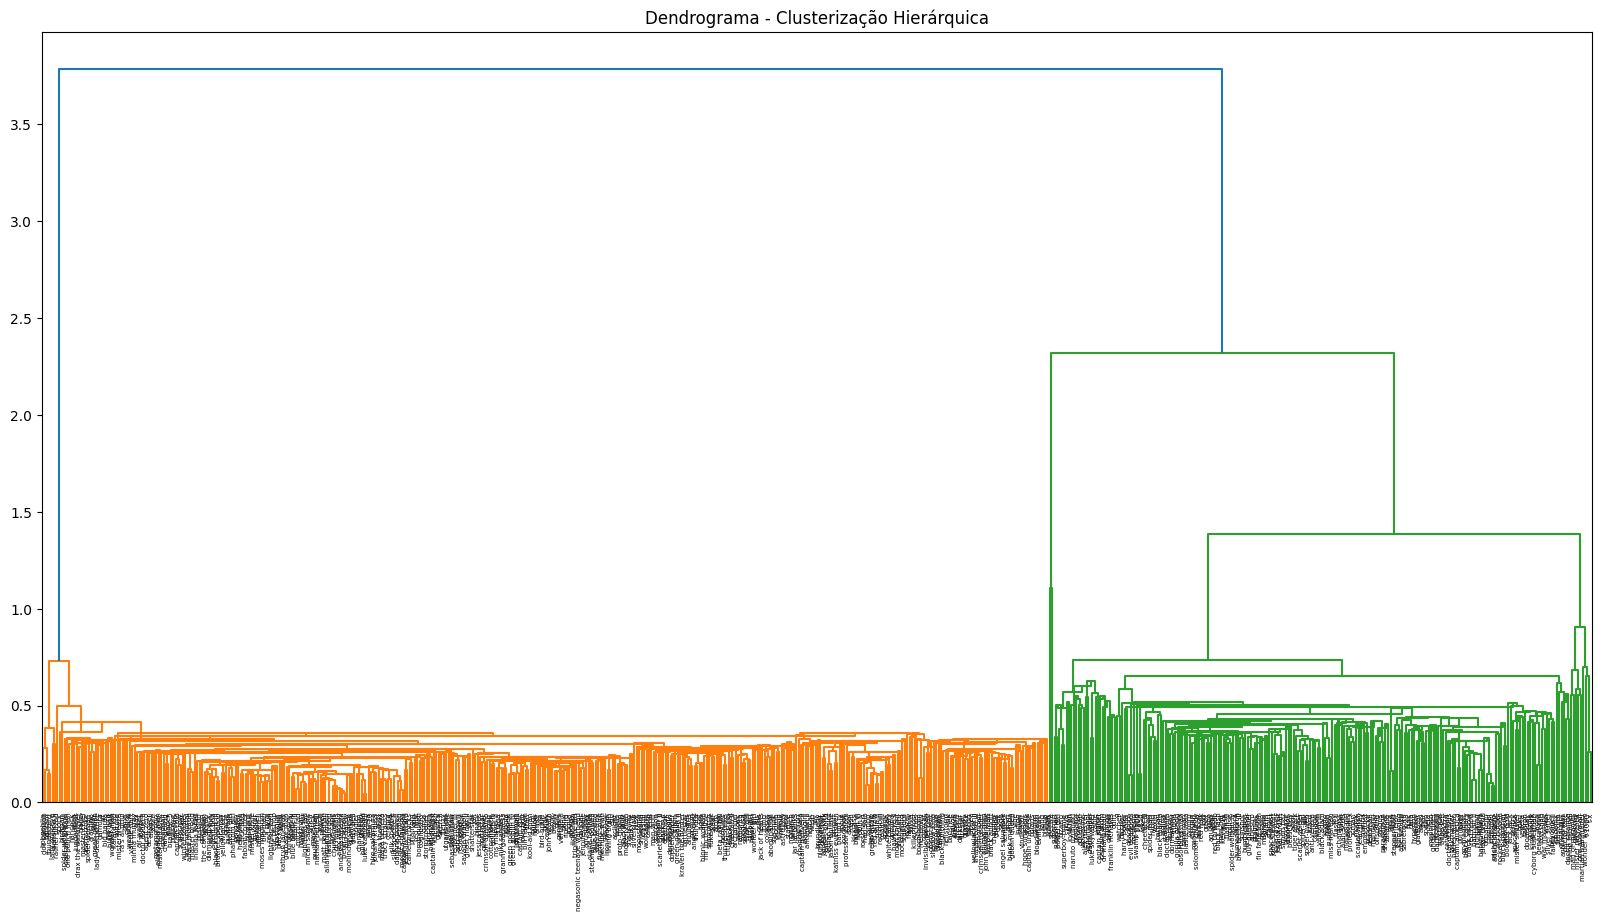

In [61]:
plot_dendograma(linkage_matrix, labels=data_to_cluster.index)

In [62]:
data_to_cluster['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=2, criterion='maxclust')

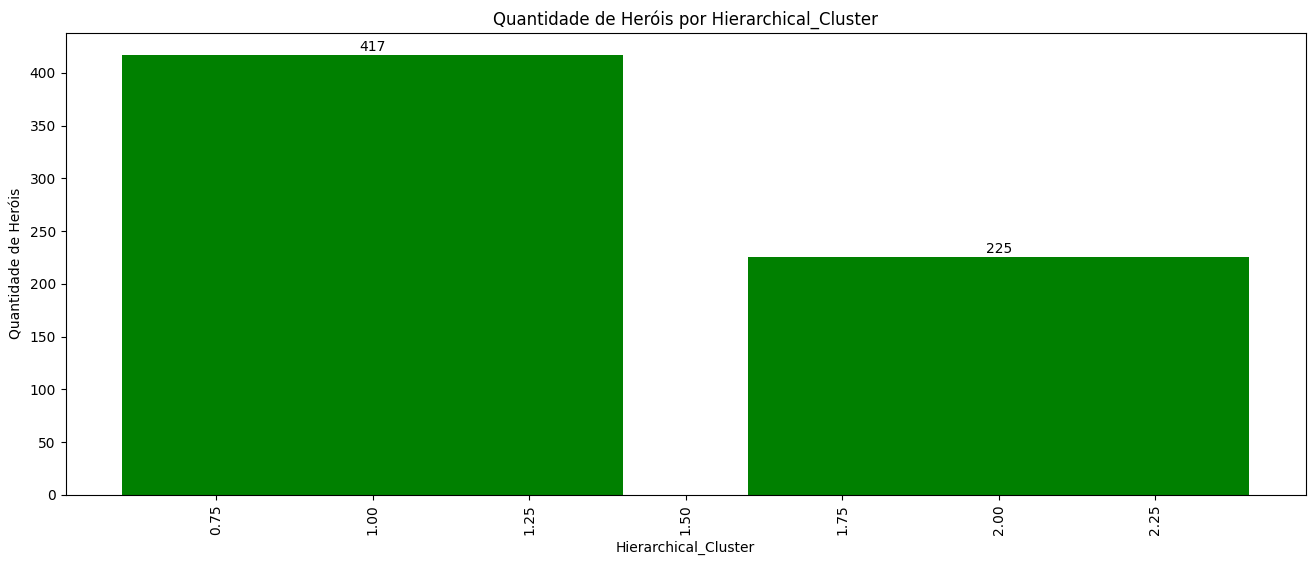

In [63]:
bar_plot('Hierarchical_Cluster',data_to_cluster.reset_index())

In [64]:
cluster_labels = data_to_cluster['Hierarchical_Cluster']
silhouette_avg = silhouette_score(dist_matrix, cluster_labels)

sample_silhouette_values = silhouette_samples(dist_matrix, cluster_labels)
print(f"Silhoueta score: {silhouette_avg}")

Silhoueta score: 0.44290217757225037


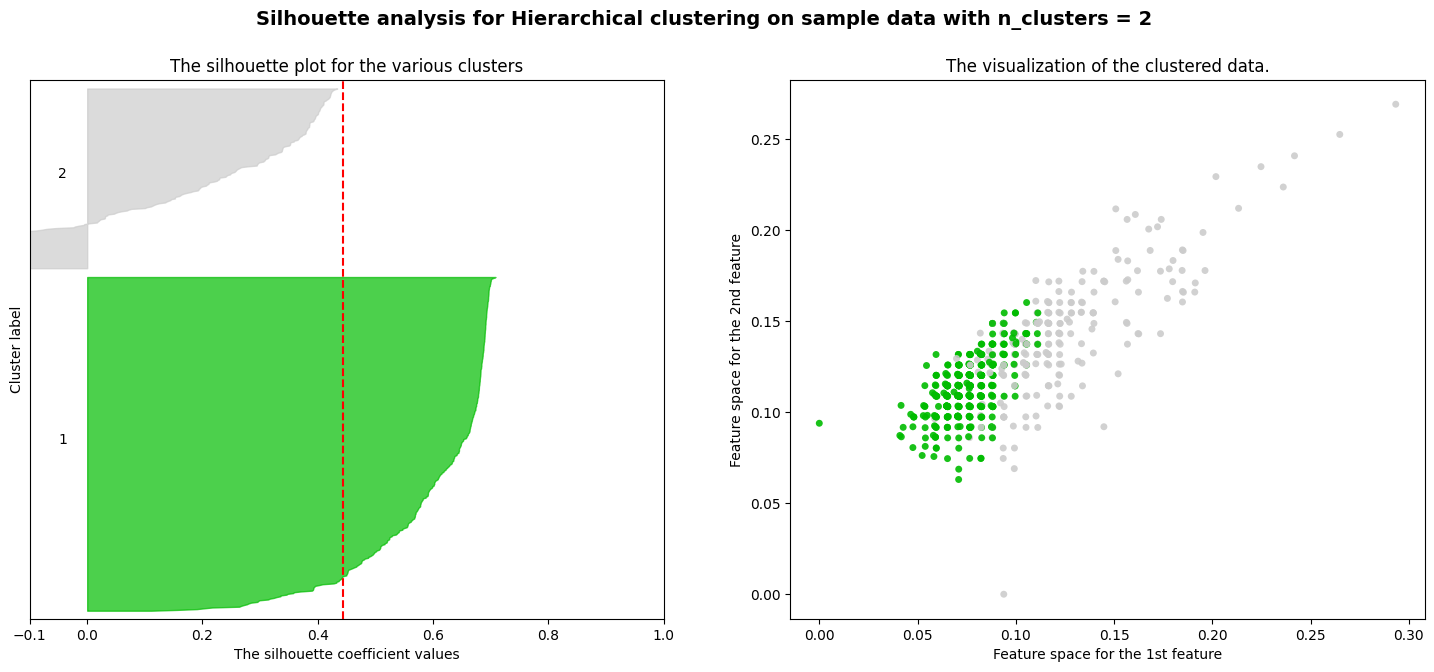

In [65]:
plot_silhouette(dist_matrix, data_to_cluster)

# Identificando os bandidos
Nesta seção, lidaremos com o problema de aprendizagem supervisionada. Mais concretamente, iremos formular uma tarefa de classificação, e nosso alvo é o alinhamento dos super-heróis (bom ou mau).


Questão 3
Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer pré-processamento e engenharia de recursos que você aplicou no processo.
1. Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?
2. Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?
3. Como você avalia os resultados?


In [66]:
df_correlacao = data_to_cluster.drop(columns=['Hierarchical_Cluster'])

In [67]:
# results_correlaceo = matrix_correlation_plot(df_correlacao)

In [68]:
# results_correlaceo

In [69]:
# Correlação de Pearson por padrão
correlation_matrix = data_to_cluster[['weight', 'height']].corr()
print(correlation_matrix)

          weight    height
weight  1.000000  0.179067
height  0.179067  1.000000


In [70]:
from mixed_naive_bayes import MixedNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,  LabelEncoder
from models import evaluate_in_test_binary
from plot_aux import plot_confusion_matrix

In [71]:
df_class = merged_df.copy() 

In [72]:
df_class = df_class.set_index('name')

In [73]:
df_class = df_class[df_class['alignment'].isin(['good', 'bad'])]


In [74]:
df_class.groupby(['alignment']).count().iloc[:,1].reset_index()

,alignment,eye_color
0,bad,192
1,good,419


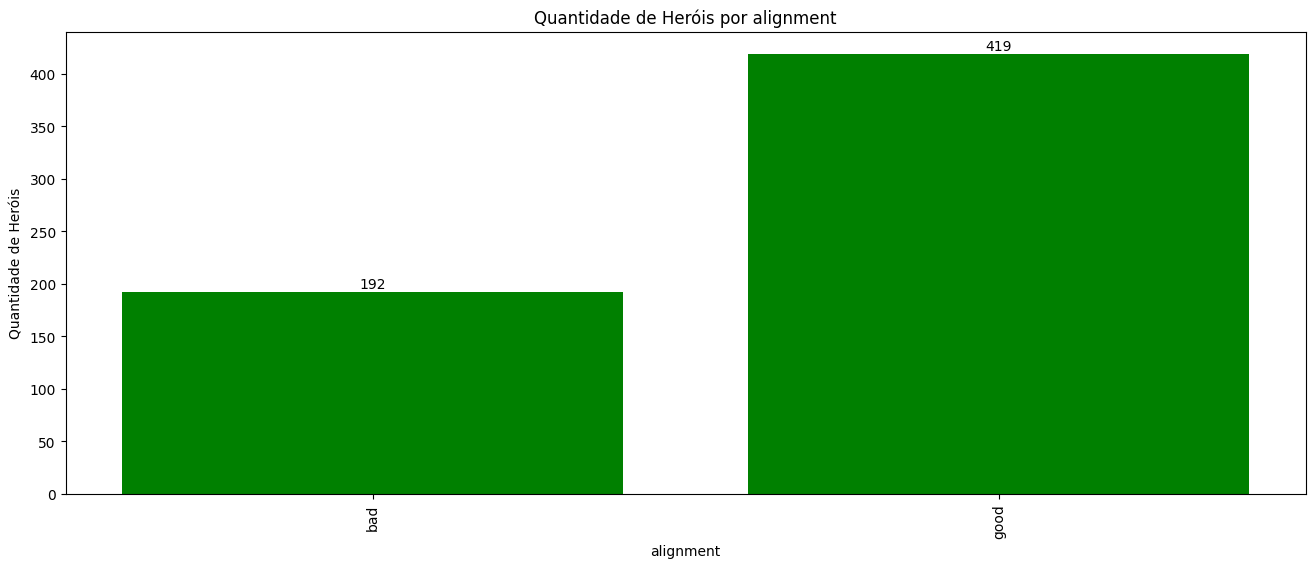

In [75]:
bar_plot(column='alignment', df=df_class.reset_index())  

In [76]:
X = df_class.drop('alignment', axis=1)
y = df_class['alignment']

In [77]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [78]:
for col in X.select_dtypes(include=['object', 'bool']).columns:
    X[col] = X[col].astype('category')

In [79]:
label_encoders = {}
for col in X.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [81]:
model = MixedNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/mixed_naive_bayes/mixed_naive_bayes.py:275: RuntimeWarning: invalid value encountered in divide
  normalised = finals/finals.sum(axis=1, keepdims=True)


In [82]:
evaluate_in_test_binary(model, X_test, y_test, le_y)

Model Performance in test
              precision    recall  f1-score   support

         bad     0.3241    0.8974    0.4762        39
        good     0.7333    0.1310    0.2222        84

    accuracy                         0.3740       123
   macro avg     0.5287    0.5142    0.3492       123
weighted avg     0.6036    0.3740    0.3027       123

Acurácia: 37.40%
f1 score weighted: 30.27%


/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/mixed_naive_bayes/mixed_naive_bayes.py:275: RuntimeWarning: invalid value encountered in divide
  normalised = finals/finals.sum(axis=1, keepdims=True)


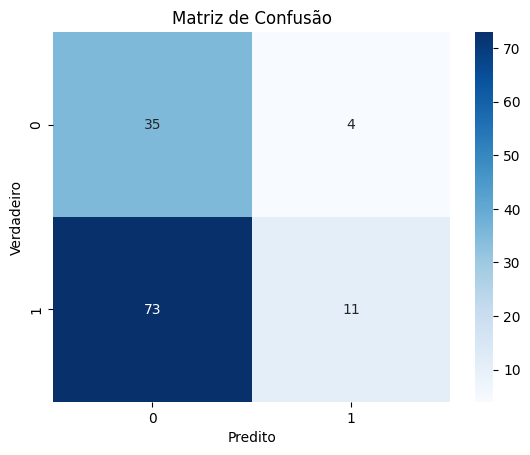

In [83]:
plot_confusion_matrix(y_test, y_pred)

In [84]:
from models import (
    plot_feature_importance, 
    objective_rfc, 
    fit_best_rf_model )
import optuna 
from optuna.samplers import TPESampler

In [85]:
# create a study (aim to maximize score)
study = optuna.create_study(sampler=TPESampler(), direction='maximize')

[I 2024-12-09 13:19:24,535] A new study created in memory with name: no-name-55d3f8b4-e72f-4a6f-a102-994e19c829a1


In [86]:
study.optimize(lambda trial: objective_rfc(trial, X_train, y_train), n_trials=100)

[I 2024-12-09 13:19:26,678] Trial 0 finished with value: 0.5729563016347697 and parameters: {'n_estimators': 1040, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.5729563016347697.
[I 2024-12-09 13:19:27,525] Trial 1 finished with value: 0.5924606946986412 and parameters: {'n_estimators': 540, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 20, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5924606946986412.
[I 2024-12-09 13:19:28,213] Trial 2 finished with value: 0.5729563016347697 and parameters: {'n_estimators': 1550, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 110, 'max_features': 'log2'}. Best is trial 1 with value: 0.5924606946986412.
[I 2024-12-09 13:19:28,868] Trial 3 finished with value: 0.5635451799328622 and parameters: {'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 70, 'max_features': 'log2'}. Best is trial 1 with value: 0.5924606946

In [87]:
MODEL_RT_BEST = fit_best_rf_model(study.best_trial.params, X_train, y_train)

In [88]:

evaluate_in_test_binary(MODEL_RT_BEST, X_test, y_test, le_y)


Model Performance in test
              precision    recall  f1-score   support

         bad     0.7500    0.0769    0.1395        39
        good     0.6975    0.9881    0.8177        84

    accuracy                         0.6992       123
   macro avg     0.7237    0.5325    0.4786       123
weighted avg     0.7141    0.6992    0.6027       123

Acurácia: 69.92%
f1 score weighted: 60.27%


In [89]:
features_names = df_class.columns.to_list()
features_names.remove('alignment')

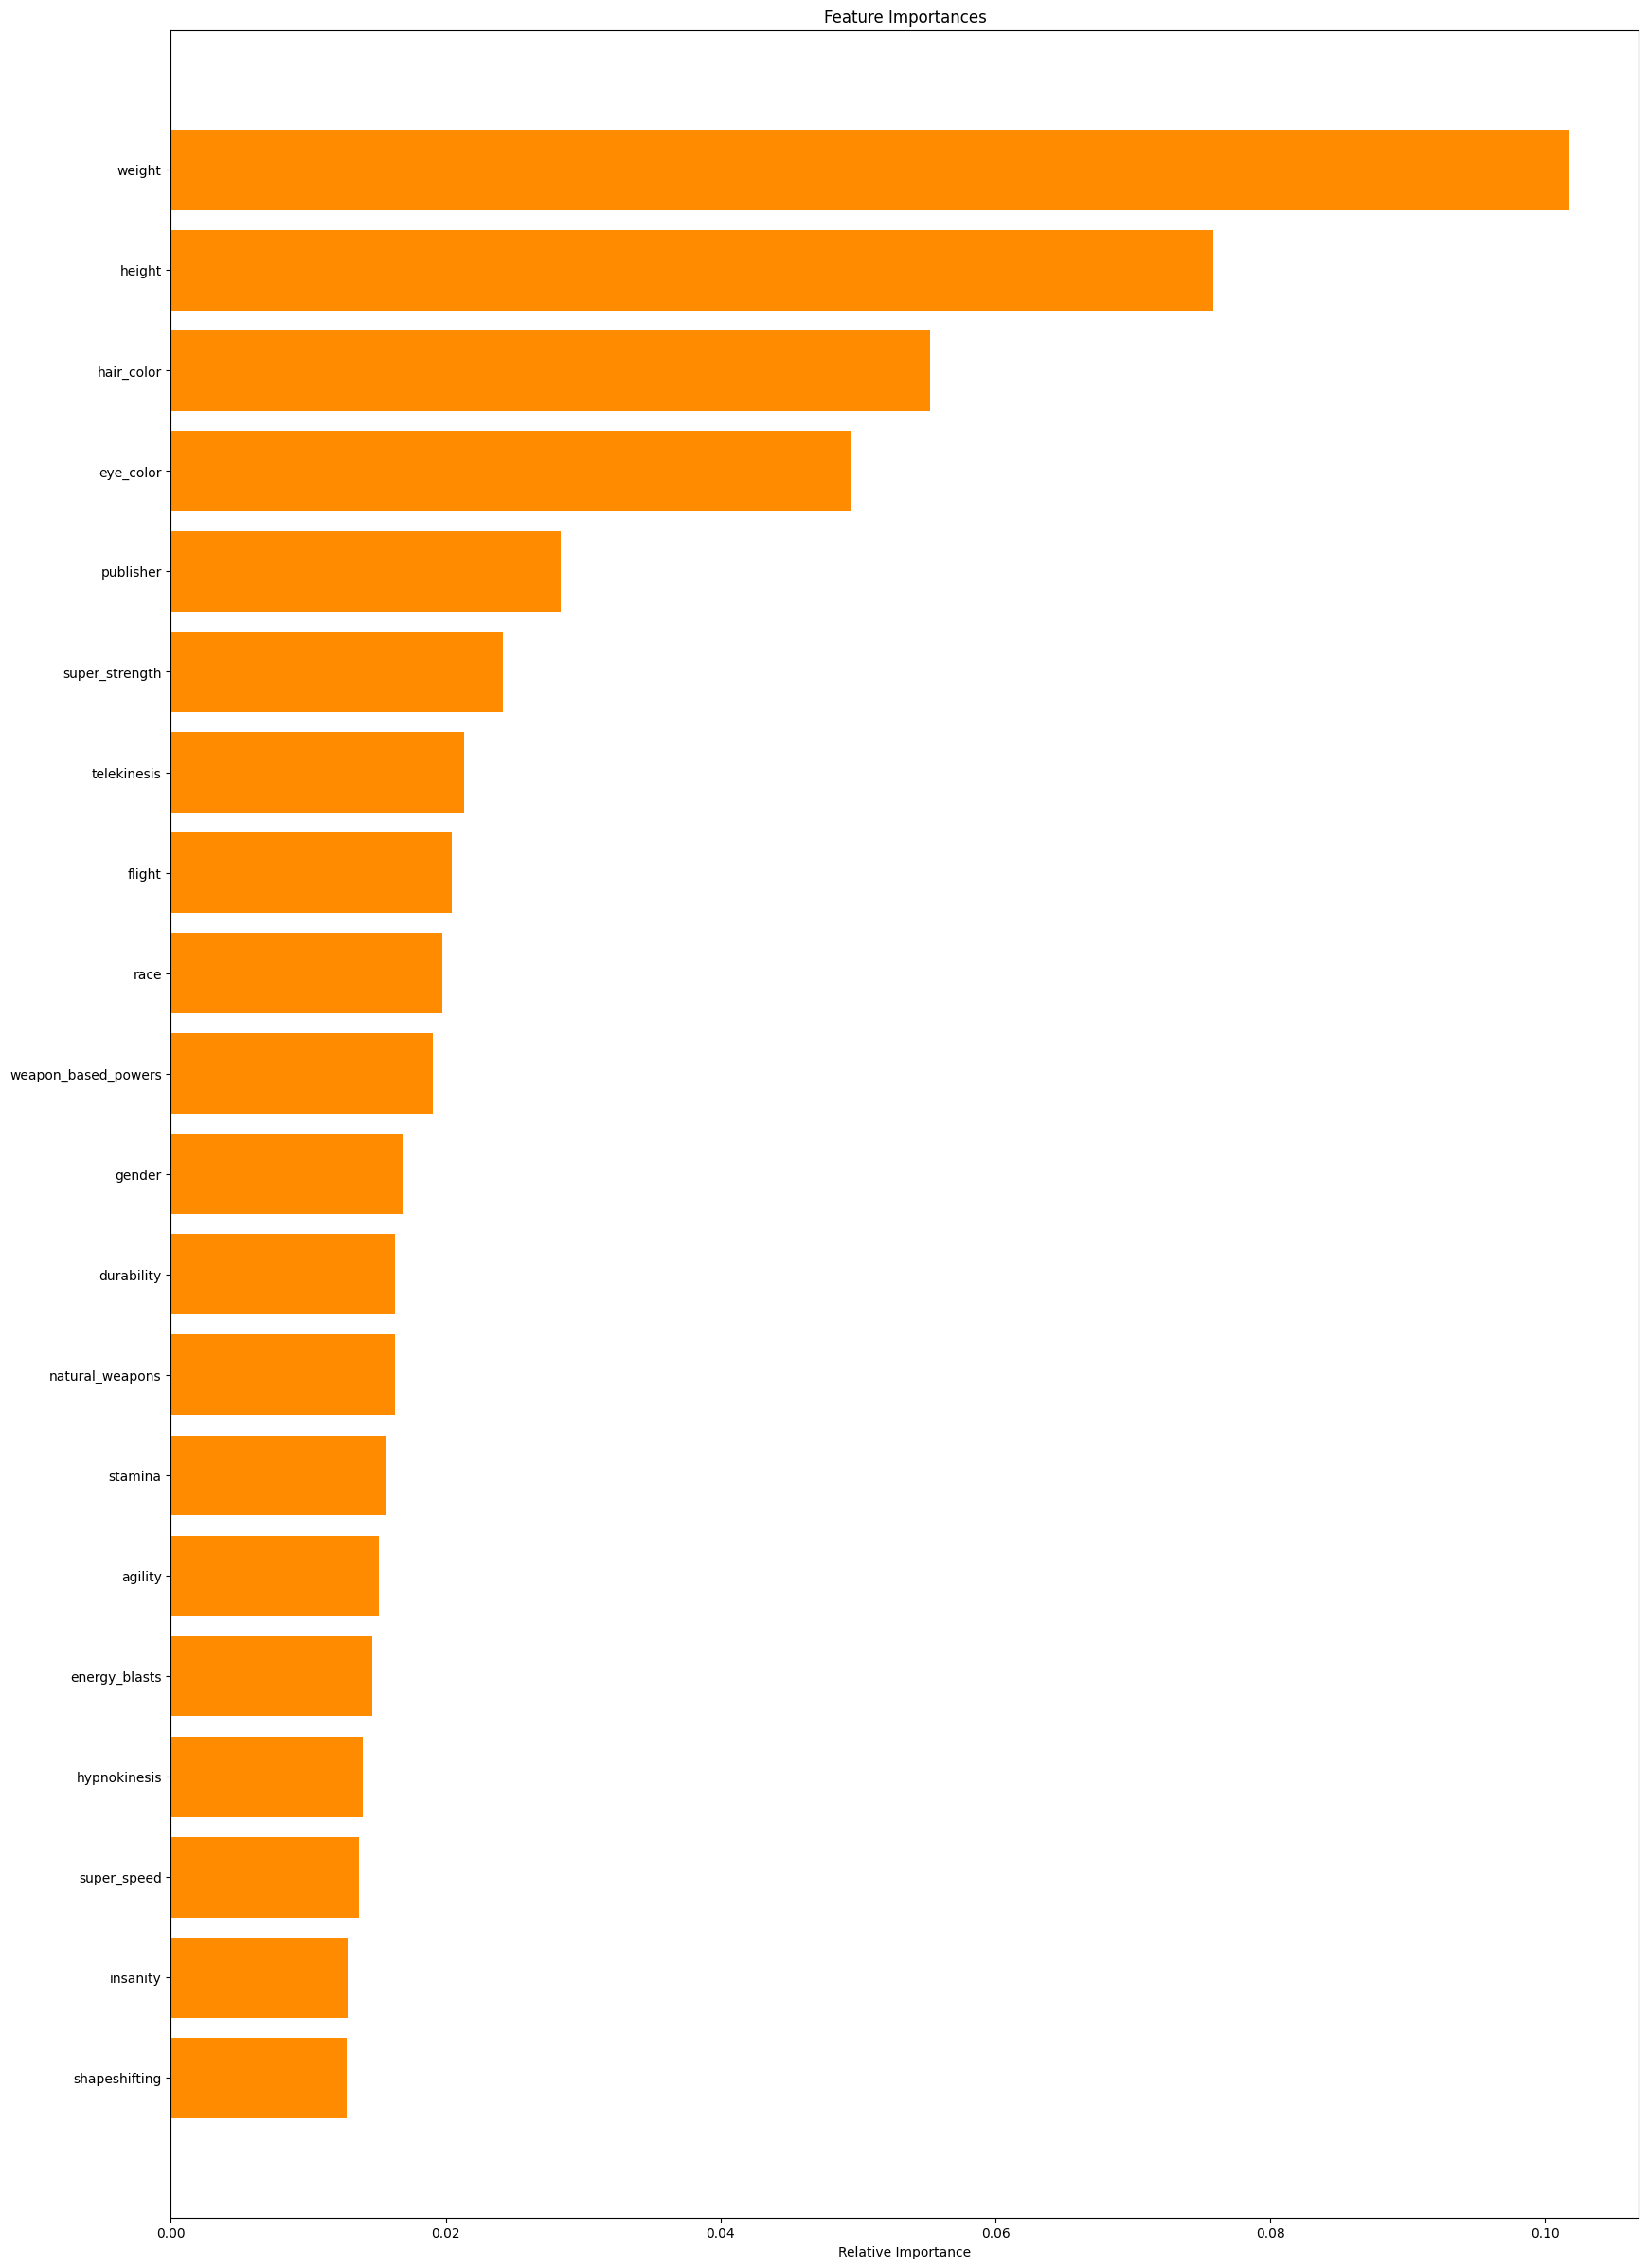

In [90]:
plot_feature_importance(fit_best_rf_model(study.best_trial.params, X_train, y_train), 20,feature_names=features_names)

# Além do bem e do mal
Questão 5
Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.
1. Qual algoritmo você escolheu e por quê?
2. Como você avalia o desempenho do seu algoritmo neste caso?


In [91]:
weight_anova_df[weight_anova_df['PR(>F)']< 0.05]

,index,sum_sq,df,F,PR(>F),variable
0,C(gender),233195.859164,2.0,10.523701,3.403721e-05,gender
2,C(eye_color),466104.411984,6.0,7.285851,1.914497e-07,eye_color
4,C(race),124695.104379,2.0,5.508953,4.324528e-03,race
6,C(hair_color),323154.485241,6.0,4.905833,7.111142e-05,hair_color
10,C(alignment),311875.484714,3.0,9.510443,4.193092e-06,alignment


In [92]:
weight_anova_significativas

['gender', 'eye_color', 'race', 'hair_color', 'alignment']

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [94]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from plot_aux import plot_predict_true_values_scatter

In [95]:
heroes_without_weight = heroes_info_df[heroes_info_df['weight']==-99.0]['name'].tolist()

In [96]:
data_regressor = data_to_cluster.reset_index()

In [97]:
data_regressor.size

113634

In [98]:
data_regressor[numeric_features] = scaler.inverse_transform(data_regressor[numeric_features])

In [99]:
data_regressor_selected =  data_regressor[~data_regressor['name'].isin(heroes_without_weight)]

In [100]:
data_regressor_selected.size

80535

In [101]:
data_regressor_selected = data_regressor_selected.set_index('name')

In [102]:
all_columns = data_regressor_selected.columns.tolist()

In [103]:
all_columns.remove('Hierarchical_Cluster')

In [104]:
for_weight_anova_df = calculate_anova(
    df=data_regressor_selected, 
    numeric_var='weight', categorical_vars=all_columns)

/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/anapaula/projects/case_alelo/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning:

In [105]:
list_features_weight = for_weight_anova_df[for_weight_anova_df['PR(>F)']< 0.05]['variable'].tolist()

In [106]:
len(list_features_weight)

33

In [107]:
data_to_regressao = data_regressor[list_features_weight]

In [108]:
categorical_features_regress = data_to_regressao.select_dtypes(include=['category']).columns.tolist()

In [109]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

encoded_features = encoder.fit_transform(data_to_regressao[categorical_features_regress])

encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features_regress))

df_encoded = pd.concat([data_to_regressao, encoded_df], axis=1).drop(categorical_features_regress, axis=1)



In [110]:
numeric_features_name = ['height', 'weight']

In [111]:
scaler = MinMaxScaler()

df_encoded[numeric_features_name] = scaler.fit_transform(df_encoded[numeric_features_name])

In [112]:
df_encoded.head()

,height,weight,gender_1,gender_2,eye_color_1,eye_color_2,eye_color_3,eye_color_4,eye_color_5,eye_color_6,...,natural_weapons_1,radiation_immunity_1,toxin_and_disease_resistance_1,omnilingualism_1,magnetism_1,radiation_absorption_1,super_breath_1,resurrection_1,odin_force_1,symbiote_costume_1
0,0.195666,0.488864,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.183163,0.070156,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176912,0.097996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.195666,0.488864,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.184849,0.160467,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df_encoded.columns

Index(['height', 'weight', 'gender_1', 'gender_2', 'eye_color_1',
       'eye_color_2', 'eye_color_3', 'eye_color_4', 'eye_color_5',
       'eye_color_6', 'race_1', 'race_2', 'hair_color_1', 'hair_color_2',
       'hair_color_3', 'hair_color_4', 'hair_color_5', 'hair_color_6',
       'alignment_1', 'alignment_2', 'alignment_3', 'accelerated_healing_1',
       'cold_resistance_1', 'durability_1', 'longevity_1', 'super_strength_1',
       'stamina_1', 'super_speed_1', 'enhanced_senses_1', 'jump_1',
       'immortality_1', 'invulnerability_1', 'self_sustenance_1',
       'radiation_control_1', 'mind_control_1', 'natural_armor_1',
       'heat_resistance_1', 'natural_weapons_1', 'radiation_immunity_1',
       'toxin_and_disease_resistance_1', 'omnilingualism_1', 'magnetism_1',
       'radiation_absorption_1', 'super_breath_1', 'resurrection_1',
       'odin_force_1', 'symbiote_costume_1'],
      dtype='object')

In [114]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [115]:
target = 'weight'

In [116]:
X =  df_encoded.drop(columns=[target])
y = df_encoded[target]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [119]:
# Calculate R² score
r2 = r2_score( y_test,   y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.27


In [120]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.004427657012825832


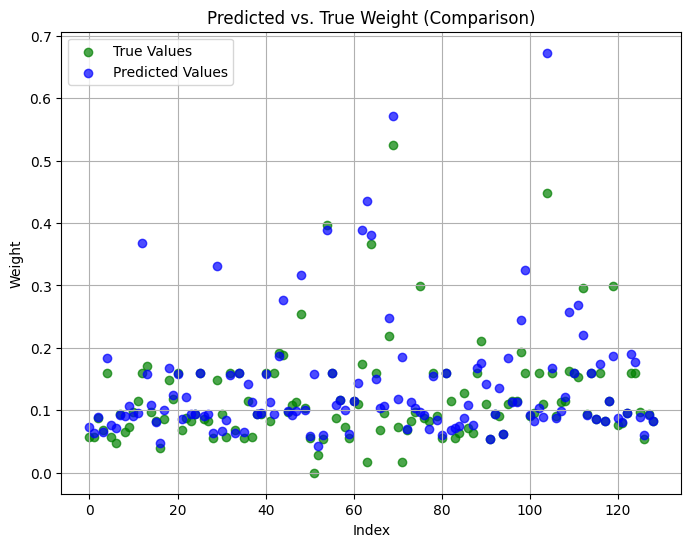

In [121]:
plot_predict_true_values_scatter(y_test,y_pred )
